## Assignment 2: $k$ Nearest Neighbor

### Do any four.

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?

Regression predicts a continuous numerical value, and classification predicts a categorical label. The difference is the type of output; regression outputs numbers, classification outputs categories.

2. What is a confusion table/matrix? What does it help us understand about a model's performance? 

A confusion matrix is a table comparing actual labels to predicted labels. It includes true positives, true negatives, false positives, and false negatives. It helps us understand how many predictions were correct but specifically what types of errors the model makes.

3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?

Accuracy is the proportion of correct predictions out of all predictions. It may be insufficient when classes are imbalanced, since a model can achieve high accuracy by always predicting the majority while performing poorly on the minority.

4. What does the root mean squared error quantify about a particular model?

RMSE measures the average magnitude of prediction errors in regression by taking the square root of the average squared differences between actual and predicted values.

5. What are overfitting and underfitting? 

Overfitting is when a model is too complex and fits noise in the training data, resulting in low training error but high test error. Underfitting is when a model is too simple to capture underlying patterns, leading to high error on training and test data.
6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?


Splitting data into training and testing sets allows us to evaluate performance on unseen data. Choosing parameters based on test accuracy or RMSE helps prevent overfitting and makes sure the model generalizes better to new data.

7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Predicting a class label gives a direct decision but is not confident. Predicting probabilities provides information about uncertainty, but it requires choosing a cutoff to make final decisions.

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

df = pd.read_csv('../data/land_mines.csv')
df.head()

,voltage,height,soil,mine_type
0,0.338157,0.000000,0.0,1
1,0.320241,0.181818,0.0,1
2,0.287009,0.272727,0.0,1
3,0.256284,0.454545,0.0,1
4,0.262840,0.545455,0.0,1


In [2]:
print(df['mine_type'].value_counts())
print(df.describe())

mine_type
1    71
2    70
3    66
4    66
5    65
Name: count, dtype: int64
          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000


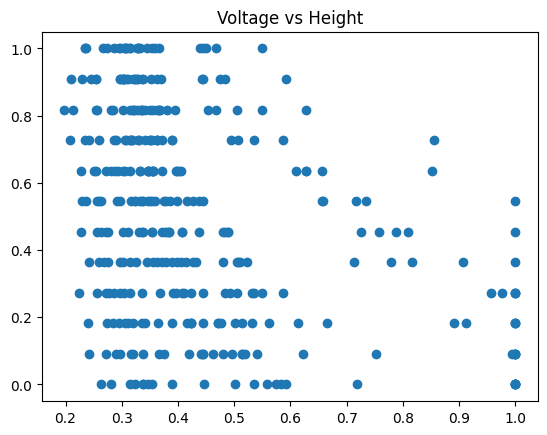

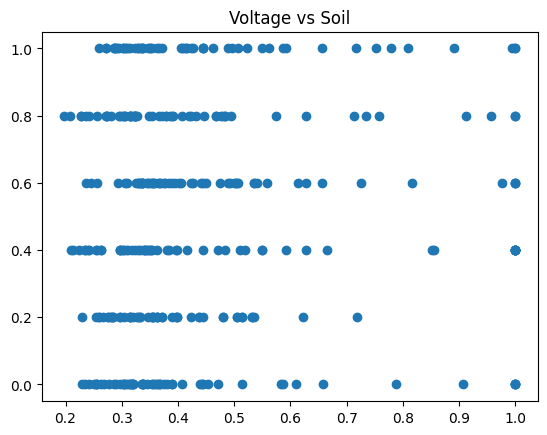

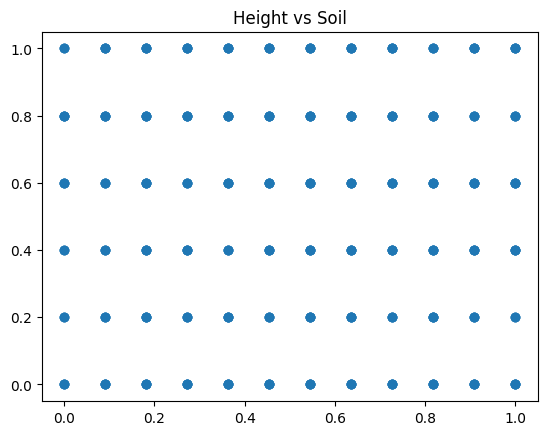

In [3]:
plt.scatter(df['voltage'], df['height'])
plt.title('Voltage vs Height')
plt.show()
plt.scatter(df['voltage'], df['soil'])
plt.title('Voltage vs Soil')
plt.show()
plt.scatter(df['height'], df['soil'])
plt.title('Height vs Soil')
plt.show()

In [4]:
X = df[['voltage', 'height', 'soil']]
y = df['mine_type']

# 50/50 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (169, 3)
Test size: (169, 3)


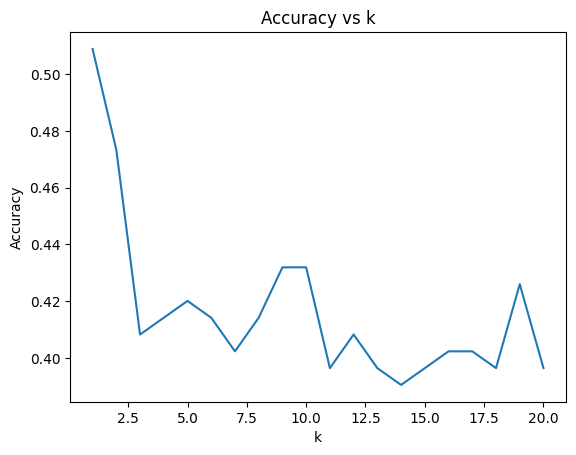

Best k: 1
Best accuracy: 0.5088757396449705


In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.plot(k_values, accuracies)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.show()

# Best k
best_k = k_values[np.argmax(accuracies)]
print("Best k:", best_k)
print("Best accuracy:", max(accuracies))

# To select k, try multiple values (1-21), compute validation accuracy for each, and choose the k with the highest test accuracy.

In [6]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = best_knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Final accuracy:", accuracy)

[[22  0  3  3  8]
 [ 0 32  0  3  0]
 [ 7  0 10  9  7]
 [ 6  5  4 13  5]
 [ 6  0 10  7  9]]
Final accuracy: 0.5088757396449705


Practical recommendations: Use probability estimates, use human oversight, retrain the model with new field data, and combine with other tools rather than relying solely on k-NN.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [7]:
cars = pd.read_csv('../data/USA_cars_datasets.csv')
cars.head()
clean_cars = cars.loc[:, ['price', 'mileage', 'year']]
clean_cars = clean_cars.dropna()

print(clean_cars.isna().sum())
print(clean_cars.shape)

clean_cars.head()

price      0
mileage    0
year       0
dtype: int64
(2499, 3)


,price,mileage,year
0,6300,274117,2008
1,2899,190552,2011
2,5350,39590,2018
3,25000,64146,2014
4,27700,6654,2018


In [8]:
from sklearn.preprocessing import MinMaxScaler

# normalize year and mileage maxmin
scaler = MinMaxScaler()
clean_cars[['year', 'mileage']] = scaler.fit_transform(clean_cars[['year', 'mileage']])
clean_cars.head()

,price,mileage,year
0,6300,0.269287,0.744681
1,2899,0.187194,0.808511
2,5350,0.038892,0.957447
3,25000,0.063016,0.872340
4,27700,0.006537,0.957447


In [9]:
X = clean_cars[['year', 'mileage']]
y = clean_cars['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Test size:", X_test.shape)

Training size: (1999, 2)
Test size: (500, 2)


k = 3, MSE = 148065935.51955554


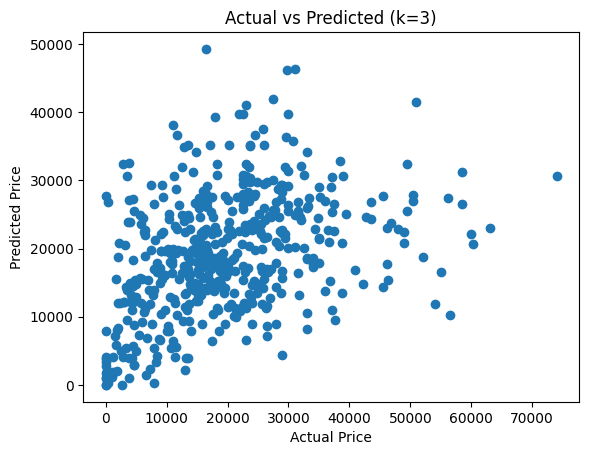

k = 10, MSE = 117399126.10604002


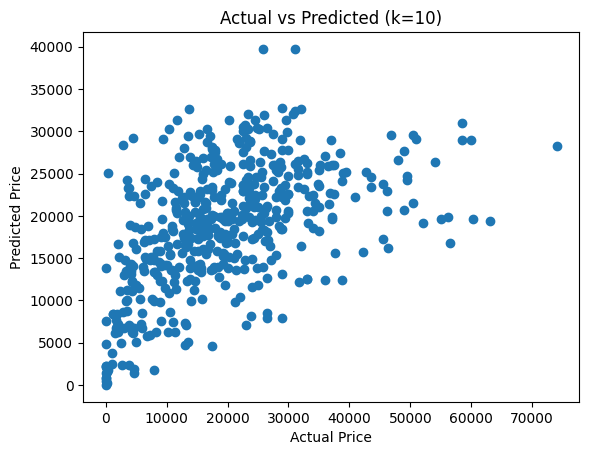

k = 25, MSE = 112576160.82390079


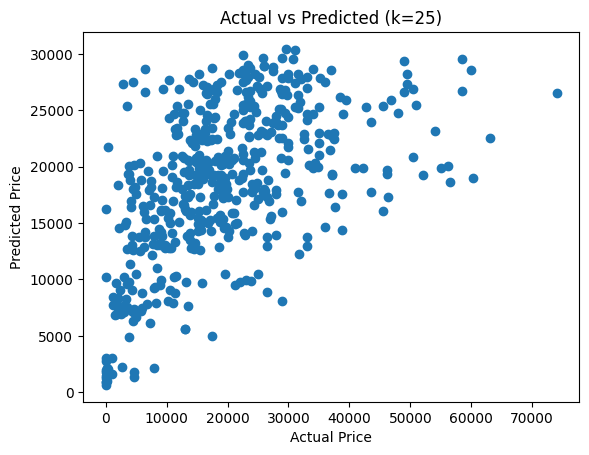

k = 50, MSE = 110202549.3014296


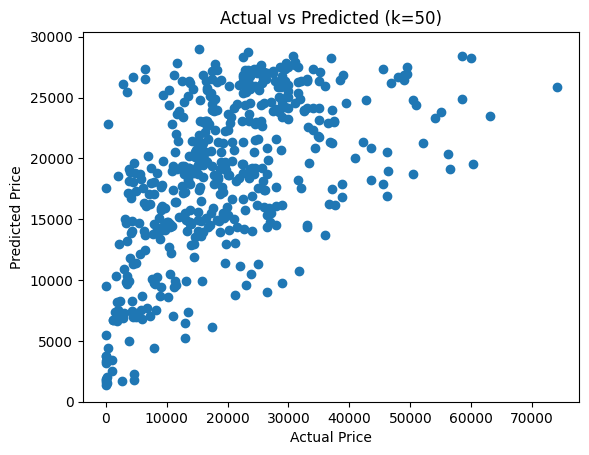

k = 100, MSE = 112253702.9700672


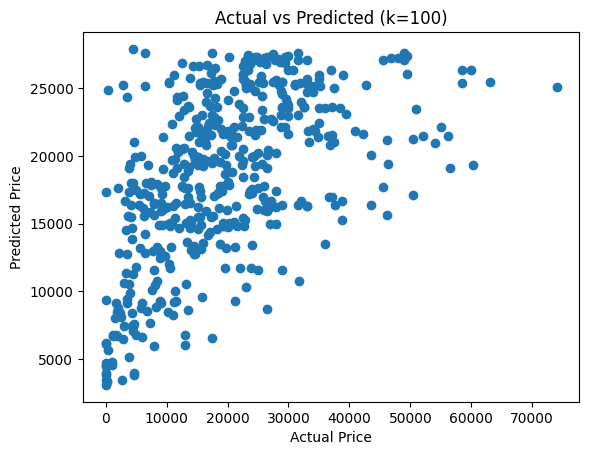

k = 300, MSE = 114496092.28682345


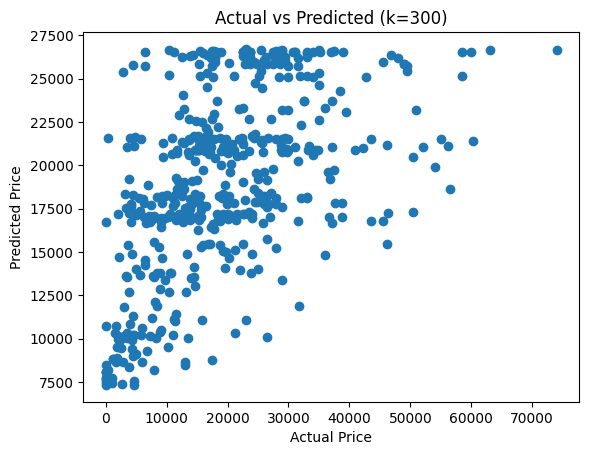

In [10]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

k_values = [3, 10, 25, 50, 100, 300]
mse_results = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)
    
    print(f"k = {k}, MSE = {mse}")
    
    # Scatterplot: Actual vs Predicted
    plt.figure()
    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs Predicted (k={k})")
    plt.show()

In [11]:
best_k = k_values[np.argmin(mse_results)]
best_mse = min(mse_results)

print("Optimal k:", best_k)
print("Lowest MSE:", best_mse)

Optimal k: 50
Lowest MSE: 110202549.3014296


For a small k, the scatterplot shows high variance and there is risk of overfitting. As k increases, predictions bevome smoother and bias/variance are more balanced. For a large k, there is high bias and low variance and there is risk of underfitting.

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings. 
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

In [12]:
airbnb = pd.read_csv('../data/airbnb_hw.csv')
airbnb_clean = airbnb.loc[:, ['Review Scores Rating', 'Price', 'Beds']]
print(airbnb_clean.head())

airbnb_missing = airbnb.loc[airbnb_clean['Review Scores Rating'].isnull()].copy()
print(airbnb_missing.shape)

airbnb_clean['Price'] = (
    airbnb_clean['Price']
    .astype(str)
    .str.replace(',', '', regex=False)
    .astype(float)
)
airbnb_missing['Price'] = (
    airbnb_missing['Price']
    .astype(str)
    .str.replace(',', '', regex=False)
    .astype(float)
)


airbnb_clean = airbnb_clean.dropna(axis=0, how='any')

print(airbnb_clean.shape)


   Review Scores Rating Price  Beds
0                   NaN   145   1.0
1                   NaN    37   1.0
2                   NaN    28   1.0
3                   NaN   199   3.0
4                  96.0   549   3.0
(8323, 13)
(22111, 3)


In [13]:
X_air = airbnb_clean[['Price', 'Beds']]
y_air = airbnb_clean['Review Scores Rating']

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_air, y_air, test_size=0.2, random_state=42
)

# Standardize
scaler = StandardScaler()
X_train_scaled_air = scaler.fit_transform(X_train)
X_test_scaled_air = scaler.transform(X_test)

In [14]:
k_values = [3, 5, 10, 25, 50, 100]
sse_results = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled_air, y_train)
    
    y_pred = knn.predict(X_test_scaled_air)
    sse = np.sum((y_test - y_pred) ** 2)
    sse_results.append(sse)
    
    print(f"k = {k}, SSE = {sse}")

# Best k is the one with the lowest SSE.
best_k = k_values[np.argmin(sse_results)]
print("Best k:", best_k)

k = 3, SSE = 486815.77777777775
k = 5, SSE = 405899.6
k = 10, SSE = 347247.20999999996
k = 25, SSE = 327639.32479999994
k = 50, SSE = 321492.23400000005
k = 100, SSE = 316041.72030000004
Best k: 100


In [17]:
airbnb_missing = airbnb_missing.dropna(subset=['Price', 'Beds'])
scaler_air = StandardScaler()

X_train_scaled_air = scaler_air.fit_transform(X_train)
X_test_scaled_air = scaler_air.transform(X_test)

# Scale full complete dataset
X_full = airbnb_clean[['Price', 'Beds']]
y_full = airbnb_clean['Review Scores Rating']

scaler_full = StandardScaler()
X_full_scaled = scaler_full.fit_transform(X_full)

# Train final model
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_full_scaled, y_full)

X_missing = airbnb_missing[['Price', 'Beds']]
X_missing_scaled = scaler_full.transform(X_missing)

airbnb_missing['Imputed Rating'] = best_knn.predict(X_missing_scaled)

print(airbnb_missing.head())

     Host Id Host Since                                Name Neighbourhood   \
0    5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1   33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2   39608626        NaN                Sunny Room in Harlem      Manhattan   
3        500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
13      2787   9/7/2008     Renovated and spacious townhome       Brooklyn   

   Property Type  Review Scores Rating (bin)        Room Type  Zipcode  Beds  \
0      Apartment                         NaN  Entire home/apt  11249.0   1.0   
1      Apartment                         NaN     Private room  11206.0   1.0   
2      Apartment                         NaN     Private room  10032.0   1.0   
3      Apartment                         NaN  Entire home/apt  10024.0   3.0   
13         House                         NaN     Private room  11223.0   1.0   

    Number of Records  Number Of Reviews  Price  R

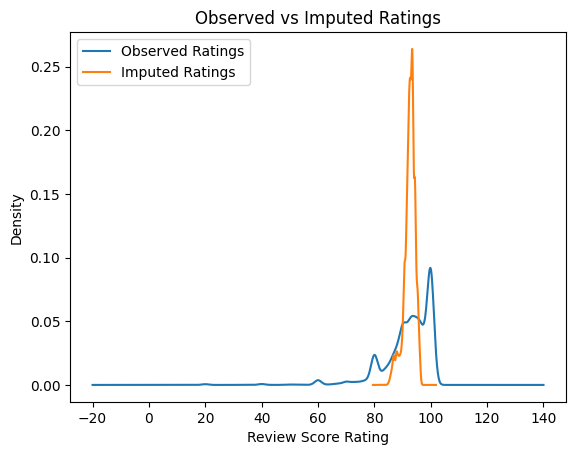

In [18]:
plt.figure()

y_air.plot(kind='kde', label='Observed Ratings')
airbnb_missing['Imputed Rating'].plot(kind='kde', label='Imputed Ratings')

plt.legend()
plt.title("Observed vs Imputed Ratings")
plt.xlabel("Review Score Rating")
plt.show()

The imputed ratings are much more concentrated around the mean than the observed ratings, because k-NN averages nearby observations and smooths predictions and reduces variability. This suggests some underfitting, since the model does not fully capture the spread of the true rating distribution.

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)